In [3]:
from os import path, listdir
from PIL import Image
import numpy as np

from tensorflow.keras.layers import GaussianNoise, Input, Reshape, Dropout, Flatten
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow import clip_by_value
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
def get_data(directory: str) -> "tuple[np.ndarray, np.ndarray]":
    ima = listdir(path.join(directory, "PNEUMONIA"))
    nema = listdir(path.join(directory, "NORMAL"))
    size = len(ima) + len(nema)
    X = np.empty((size, 250, 350), dtype=np.uint8)
    y = np.empty((size), dtype=np.uint8)
    for i, file in enumerate(ima):
        X[i] = np.asarray(Image.open(path.join(directory, "PNEUMONIA", file)))
        y[i] = 1
    for i, file in enumerate(nema):
        X[len(ima) + i] = np.asarray(Image.open(path.join(directory, "NORMAL", file)))
        y[len(ima) + i] = 0
    return X , y

In [6]:
from modeli_stefan import make_model_2

In [7]:
directory_train = "../chest_xray_norm/train"
x_train, y_train = get_data(directory_train)

directory_val = "../chest_xray_norm/val"
x_val, y_val = get_data(directory_val)

model = make_model_2(x_train[0].shape)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 350)]        0         
_________________________________________________________________
rescaling (Rescaling)        (None, 250, 350)          0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 250, 350)          0         
_________________________________________________________________
tf.clip_by_value (TFOpLambda (None, 250, 350)          0         
_________________________________________________________________
reshape (Reshape)            (None, 250, 350, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 248, 348, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 82, 116, 8)        0     

In [8]:
history = model.fit(x_train, y_train, epochs=250, batch_size=0, verbose=1, shuffle=True, validation_data=(x_val,y_val))

2022-05-24 17:06:02.592236: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-24 17:06:02.612359: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz


Epoch 1/250


2022-05-24 17:06:03.230393: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-05-24 17:06:03.354488: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-05-24 17:06:03.821214: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-05-24 17:06:03.847787: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


163/163 [==============================] - 15s 65ms/step - loss: 0.3969 - accuracy: 0.8147 - precision: 0.8384 - recall: 0.9366 - val_loss: 0.4144 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 2/250
163/163 [==============================] - 9s 53ms/step - loss: 0.1669 - accuracy: 0.9385 - precision: 0.9584 - recall: 0.9584 - val_loss: 0.5405 - val_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 3/250
163/163 [==============================] - 9s 53ms/step - loss: 0.1315 - accuracy: 0.9481 - precision: 0.9666 - recall: 0.9629 - val_loss: 0.7795 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/250
163/163 [==============================] - 9s 54ms/step - loss: 0.0981 - accuracy: 0.9652 - precision: 0.9767 - recall: 0.9762 - val_loss: 0.4415 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 5/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0896 - accuracy: 0.9697 - pre

163/163 [==============================] - 9s 54ms/step - loss: 0.0223 - accuracy: 0.9931 - precision: 0.9950 - recall: 0.9958 - val_loss: 0.3313 - val_accuracy: 0.8750 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 38/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0110 - accuracy: 0.9966 - precision: 0.9974 - recall: 0.9980 - val_loss: 0.7524 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 39/250
163/163 [==============================] - 9s 54ms/step - loss: 0.0172 - accuracy: 0.9928 - precision: 0.9944 - recall: 0.9959 - val_loss: 0.5623 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 40/250
163/163 [==============================] - 8s 51ms/step - loss: 0.0150 - accuracy: 0.9938 - precision: 0.9964 - recall: 0.9951 - val_loss: 0.6788 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 41/250
163/163 [==============================] - 8s 50ms/step - loss: 0.0149 - accuracy: 0.9954 - 

163/163 [==============================] - 9s 53ms/step - loss: 0.0027 - accuracy: 0.9995 - precision: 0.9995 - recall: 0.9997 - val_loss: 0.6674 - val_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 74/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0096 - accuracy: 0.9964 - precision: 0.9972 - recall: 0.9980 - val_loss: 0.6211 - val_accuracy: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 75/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0148 - accuracy: 0.9964 - precision: 0.9973 - recall: 0.9980 - val_loss: 1.2583 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 76/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0071 - accuracy: 0.9982 - precision: 0.9987 - recall: 0.9988 - val_loss: 0.6821 - val_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 77/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0131 - accuracy: 0.9956 - 

163/163 [==============================] - 9s 53ms/step - loss: 0.0077 - accuracy: 0.9976 - precision: 0.9986 - recall: 0.9982 - val_loss: 1.7992 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 110/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0058 - accuracy: 0.9978 - precision: 0.9990 - recall: 0.9980 - val_loss: 3.1028 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 111/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0041 - accuracy: 0.9984 - precision: 0.9982 - recall: 0.9998 - val_loss: 1.5050 - val_accuracy: 0.8750 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 112/250
163/163 [==============================] - 9s 54ms/step - loss: 0.0064 - accuracy: 0.9981 - precision: 0.9989 - recall: 0.9985 - val_loss: 2.1388 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 113/250
163/163 [==============================] - 9s 53ms/step - loss: 7.4066e-04 - accuracy: 0

Epoch 145/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0165 - accuracy: 0.9956 - precision: 0.9966 - recall: 0.9974 - val_loss: 4.1420 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 146/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0037 - accuracy: 0.9990 - precision: 0.9989 - recall: 0.9998 - val_loss: 2.6449 - val_accuracy: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 147/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0056 - accuracy: 0.9972 - precision: 0.9988 - recall: 0.9974 - val_loss: 0.6429 - val_accuracy: 0.8750 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 148/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0048 - accuracy: 0.9979 - precision: 0.9989 - recall: 0.9983 - val_loss: 2.6562 - val_accuracy: 0.8750 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 149/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0012 - a

Epoch 181/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0014 - accuracy: 0.9997 - precision: 0.9998 - recall: 0.9998 - val_loss: 0.4399 - val_accuracy: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 182/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0118 - accuracy: 0.9964 - precision: 0.9975 - recall: 0.9977 - val_loss: 1.6912 - val_accuracy: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 183/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0141 - accuracy: 0.9966 - precision: 0.9984 - recall: 0.9971 - val_loss: 0.7041 - val_accuracy: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 184/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0035 - accuracy: 0.9984 - precision: 0.9991 - recall: 0.9987 - val_loss: 2.3255 - val_accuracy: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 185/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0013 - a

Epoch 217/250
163/163 [==============================] - 9s 53ms/step - loss: 4.8553e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.8870 - val_accuracy: 0.8750 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 218/250
163/163 [==============================] - 9s 53ms/step - loss: 2.4647e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.6484 - val_accuracy: 0.8750 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 219/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0185 - accuracy: 0.9966 - precision: 0.9980 - recall: 0.9974 - val_loss: 2.0259 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 220/250
163/163 [==============================] - 9s 53ms/step - loss: 0.0102 - accuracy: 0.9965 - precision: 0.9975 - recall: 0.9978 - val_loss: 1.6519 - val_accuracy: 0.8750 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 221/250
163/163 [==============================] - 9s 53ms/step - loss: 0.

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [10]:
import matplotlib.pyplot as plt

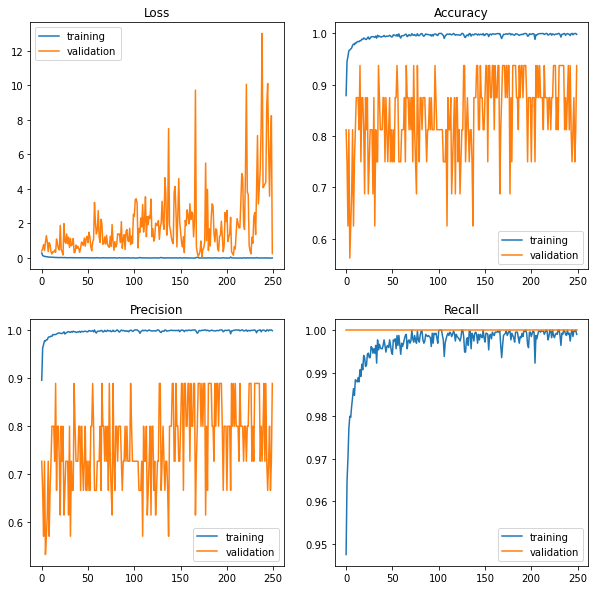

In [12]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(2, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.subplot(2, 2, 3)
plt.title('Precision')
plt.plot(history.epoch, history.history['precision'], label='training')
plt.plot(history.epoch, history.history['val_precision'], label='validation')
plt.legend(loc='best')

plt.subplot(2, 2, 4)
plt.title('Recall')
plt.plot(history.epoch, history.history['recall'], label='training')
plt.plot(history.epoch, history.history['val_recall'], label='validation')
plt.legend(loc='best')

plt.show()

In [13]:
model.save("./modeli/stefan/model_2_epoha_250.h5")

In [14]:
import json
  
# Serializing json 
json_history = json.dumps(history.history, indent = 4)
  
# Writing json
with open("./modeli/stefan/model_2_epoha_250.json", "w") as outfile:
    outfile.write(json_history)

In [17]:
# loadovanje modela
from tensorflow.keras.models import load_model

model2 = load_model('./modeli/stefan/model_2_epoha_250.h5')

In [22]:
#loadovanje istorije

with open('./modeli/stefan/model_2_epoha_250.json', 'r') as openfile:
    # Reading from json file
    history2 = json.load(openfile)


In [23]:
len(history2['loss'])

250

In [24]:
#history.history.keys()

In [25]:
#len(history.history['loss'])

In [26]:
directory_test = "../chest_xray_norm/test"
x_test, y_test = get_data(directory_test)

In [37]:
y_pred = model2.predict(x_test)

In [38]:
#y_pred_round = np.round(y_pred)

In [39]:
y_pred = y_pred.astype(int)

In [40]:
#y_test

In [41]:
#y_pred

In [42]:
y_pred = np.ravel(y_pred)

In [43]:
tacnost = [y_pred==y_test]

In [44]:
#tacnost

In [45]:
tacnost = np.average(tacnost)

In [46]:
tacnost

0.8477564102564102